In [194]:
import pandas as pd
from pandas import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
f = r'C:\Users\jflan\Downloads\Merged_Employment_Wages_in_Colorado.csv'


df=pd.read_csv(f)
df.shape
df.head(10)
codelist=df.groupby('codetitle').count()
codelist_sorted=codelist['areaname'].sort_values()
print(codelist_sorted)
sns.countplot(codelist_sorted)

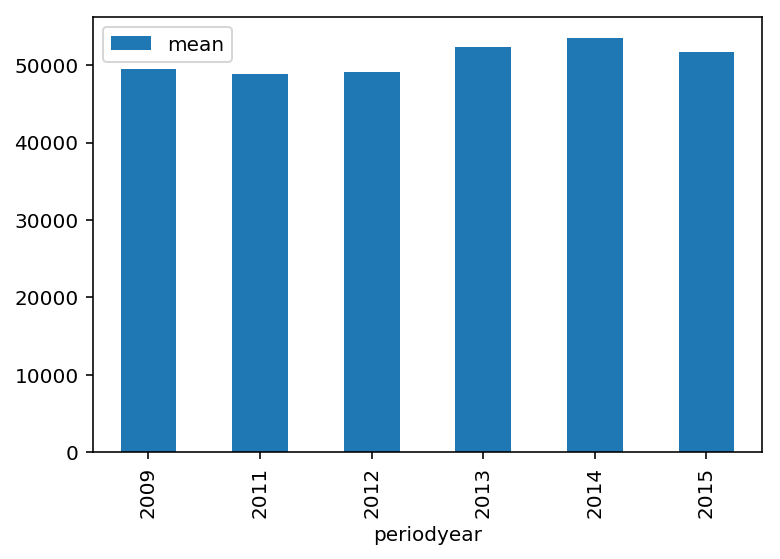

In [195]:
mean_pivot=pandas.pivot_table(data=df,values='mean',index='periodyear',aggfunc=np.mean)
mean_pivot
mean_pivot.plot(kind='bar')


C:\Users\jflan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


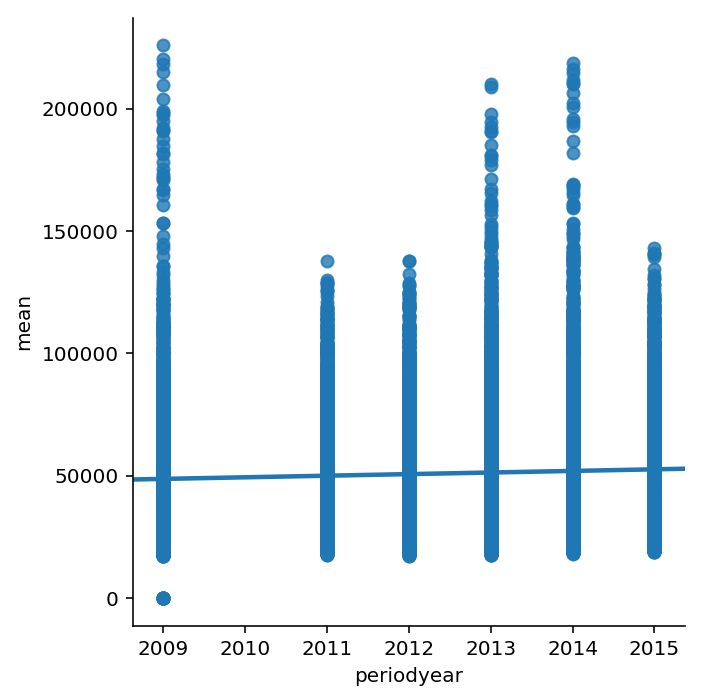

In [196]:
sns.lmplot(data=df,x='periodyear',y='mean')

50880.81940522679


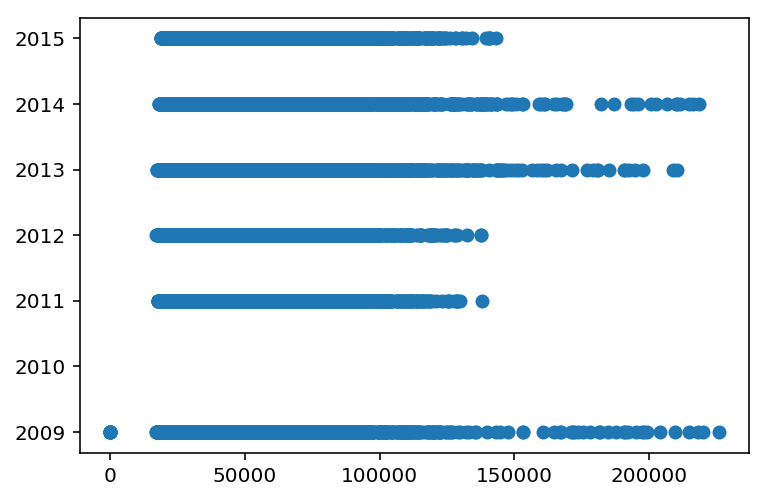

In [197]:
#Based on Occupation is there anything job that seems to be way high or perhaps much lower than is realistic
#How many unique occupations do we have?
#print(len(df['codetitle'].unique()))
#859! that's a lot I'm sure there will be some outliers. First let's find the mean of the mean
print(df['mean'].mean())
#ok, now lets do a scatter plot to see if there are any extreme values
plt.scatter(df['mean'],df['periodyear'])

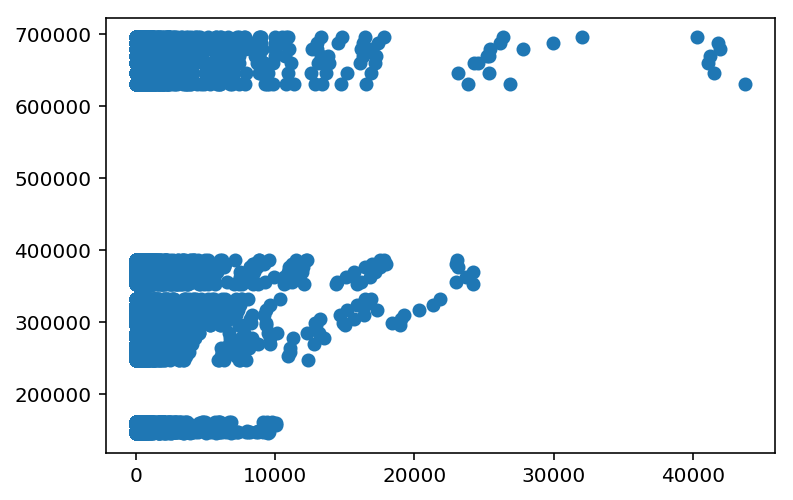

In [198]:
#let's do a scatter plot to see how employeecount changes with poulation

plt.scatter(notDenver['empcount'],notDenver['population'])

Text(0.5,0,'experience')

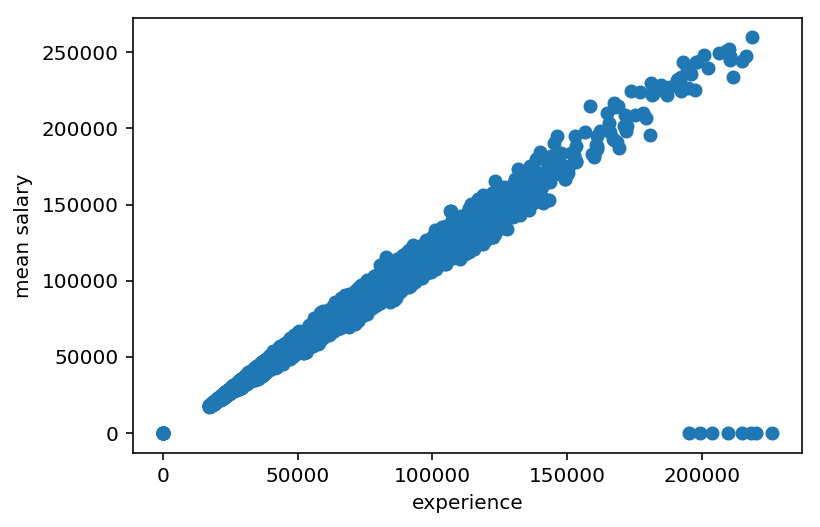

In [199]:
#Let's explore a scatterplot on experience and mean to see if there is a linear relationship between salary and experience

plt.scatter(df['mean'],df['experience'])
plt.ylabel("mean salary")
plt.xlabel("experience")

In [200]:
print(df['areaname'].unique())

['Pueblo MSA' 'Greeley MSA' 'Grand Junction MSA'
 'Fort Collins-Loveland MSA' 'Denver - Aurora MSA' 'Colorado Springs MSA'
 'Boulder-Longmont MSA']


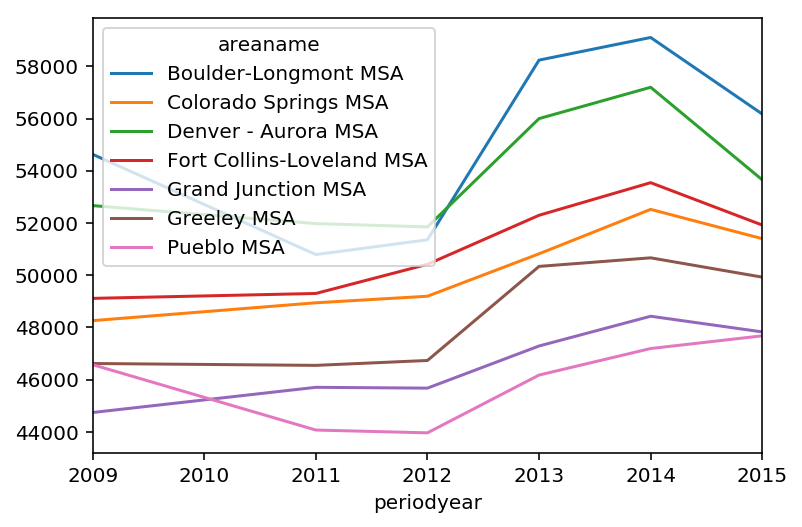

In [201]:
#it looks as though there is a direct linear relationship with a few annomolies at the high end of experience (Could be due to some of our missing data)
#Next let's plot the average mean revenue of each area by year
mean_table1= pivot_table(df,values='mean',index=['periodyear'],columns=['areaname'],aggfunc=np.mean).plot(legend='best')

In [202]:
#It looks like the mean revenue for Boulder is the highest. Denver ranks second, while at the lower end pueblo and grand junction fluctuate for last place
#Let's do the same look for industry
mean_table1= pivot_table(df,values='mean',index=['codetitle'],columns=['periodyear'],aggfunc=np.mean,fill_value='')


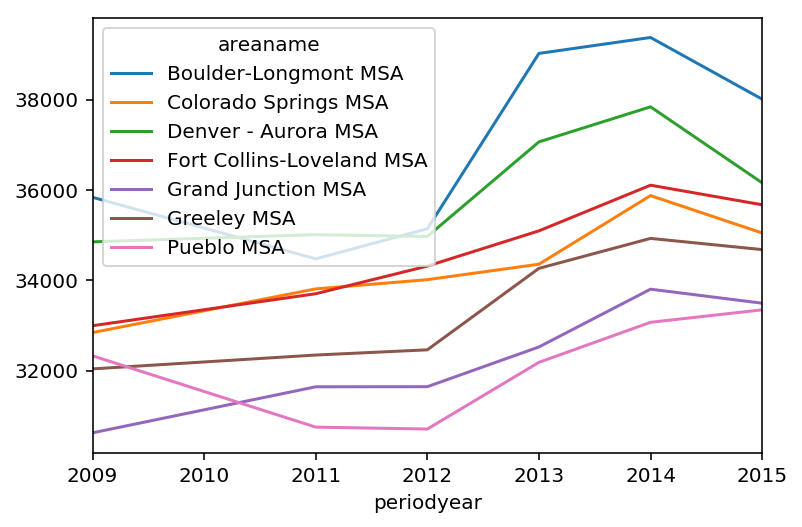

In [235]:
#let's look at how experience maps out across cities now that we have a mean revenue rank
mean_table1= pivot_table(df,values='entrywg',index=['periodyear'],columns=['areaname'],aggfunc=np.mean)
mean_table1.plot()

Text(0.5,1,'90th percentile wage by MSA')

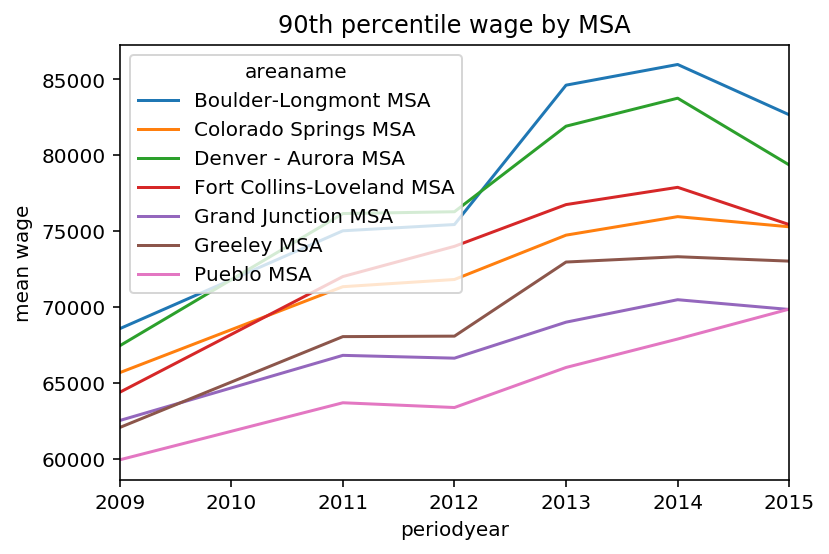

In [247]:
#let's look at how the 90pct jobs differ by area
mean_table1= pivot_table(df,values='pct90',index=['periodyear'],columns=['areaname'],aggfunc=np.mean)
mean_table1.plot()
plt.ylabel('mean wage')
plt.title('90th percentile wage by MSA')

Text(0.5,1,'25th percentile wage by MSA')

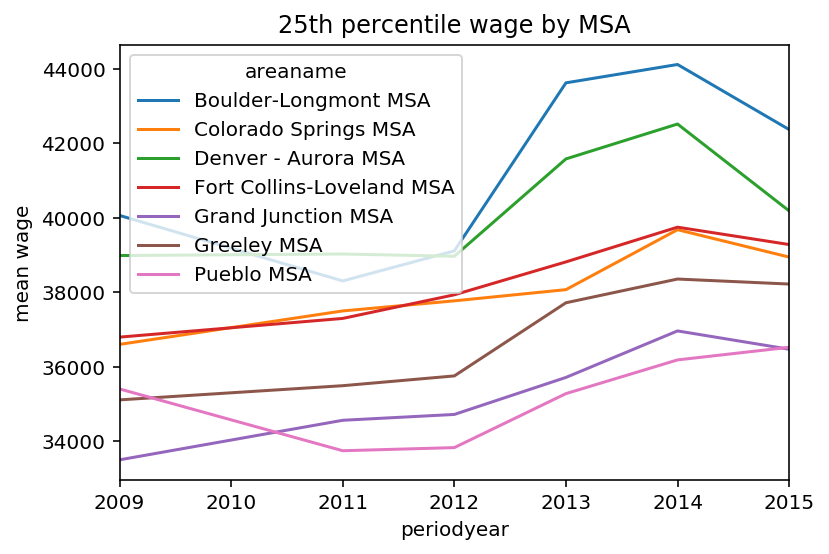

In [244]:
#let's look at how the 25pct jobs differ by area
mean_table1= pivot_table(df,values='pct25',index=['periodyear'],columns=['areaname'],aggfunc=np.mean)
mean_table1.plot()
plt.ylabel('mean wage')
plt.title('25th percentile wage by MSA')

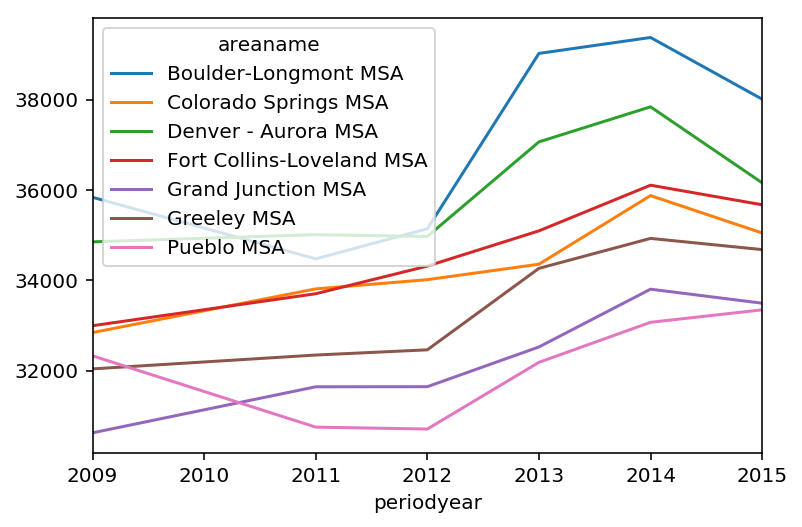

In [234]:
#Let's see if the populations vary by entry wage as well
mean_table2= pivot_table(df,values='entrywg',index=['periodyear'],columns=['areaname'],aggfunc=np.mean).plot()

Text(0.5,1,'Employee count by year by MSA')

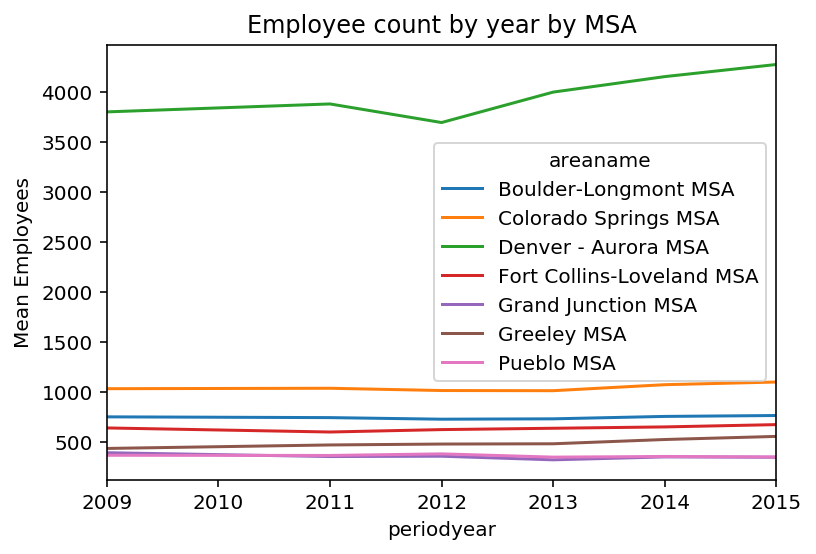

In [205]:
#Let's see how the populations play out for each of these areas as well
mean_table2= pivot_table(df,values='empcount',index=['periodyear'],columns=['areaname'],aggfunc=np.mean).plot()
plt.ylabel('Mean Employees')
plt.title('Employee count by year by MSA')

Text(0.5,1,'population by year by MSA')

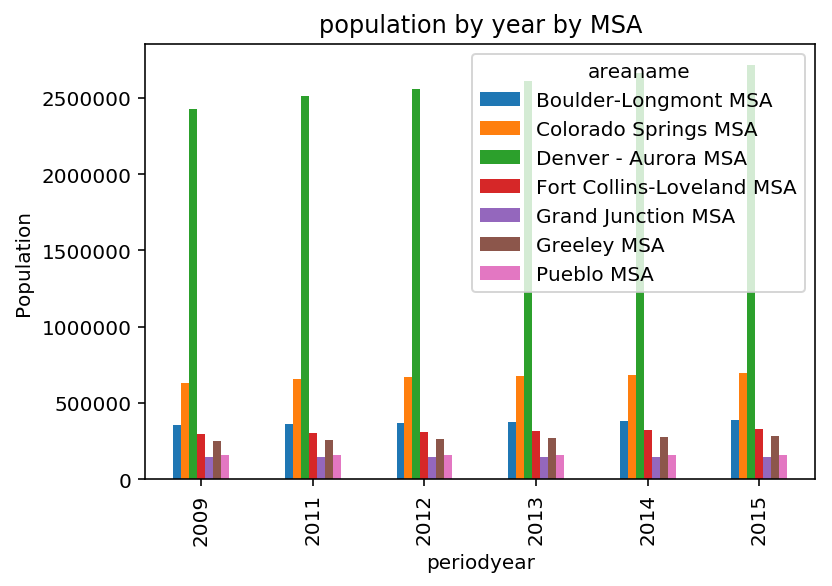

In [206]:
#Let's see if the populations vary by entry wage as well
mean_table2= pivot_table(df,values='population',index=['periodyear'],columns=['areaname'],aggfunc=np.min).plot(kind='bar')
plt.ylabel('Population')
plt.title('population by year by MSA')


##Inferential statistics
The main datapoints we are concerned with exploring in this report are:
Time: Periodyear:
Named Categories: Areaname: Each individual city Codetitle: Name of the occupation indcdoty: the descriptive title for the industry
Numeric Categories: Mean: Mean wage for occupation Entrywg: Entry level wage for the occupation, mean of the first third (ALC definition). experience: Experienced level wage for the occupation, mean of upper two thirds (ALC definition) Median: Median wage of the occupation empcount:total employment
The areas we want to explore now are:
What is experiences effect on mean wage?
What is empcount's effect on mean wage

In [207]:
#let's remove all rows with missing data
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
df.isnull().any()

Unnamed: 0    False
areaname      False
periodyear    False
codetitle     False
empcount      False
mean          False
entrywg       False
experience    False
pct10         False
pct25         False
median        False
pct75         False
pct90         False
population    False
dtype: bool

C:\Users\jflan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Employee count vs mean wage for Denver - Aurora MSA')

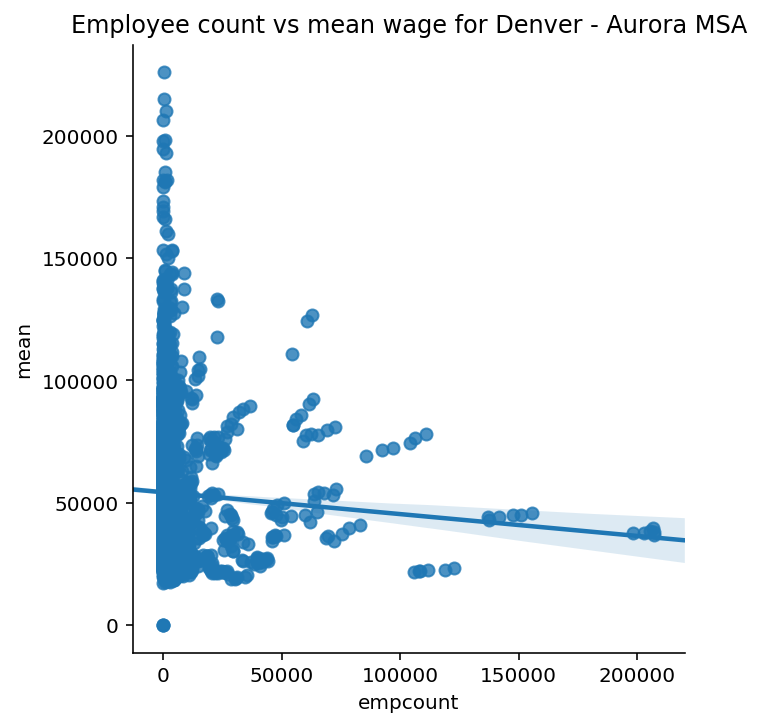

In [231]:
just_denver=df.loc[df['areaname']=='Denver - Aurora MSA']
sns.lmplot(data=just_denver,x='empcount',y='mean')
plt.title('Employee count vs mean wage for Denver - Aurora MSA')

C:\Users\jflan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Employee count vs mean wage for Pueblo MSA')

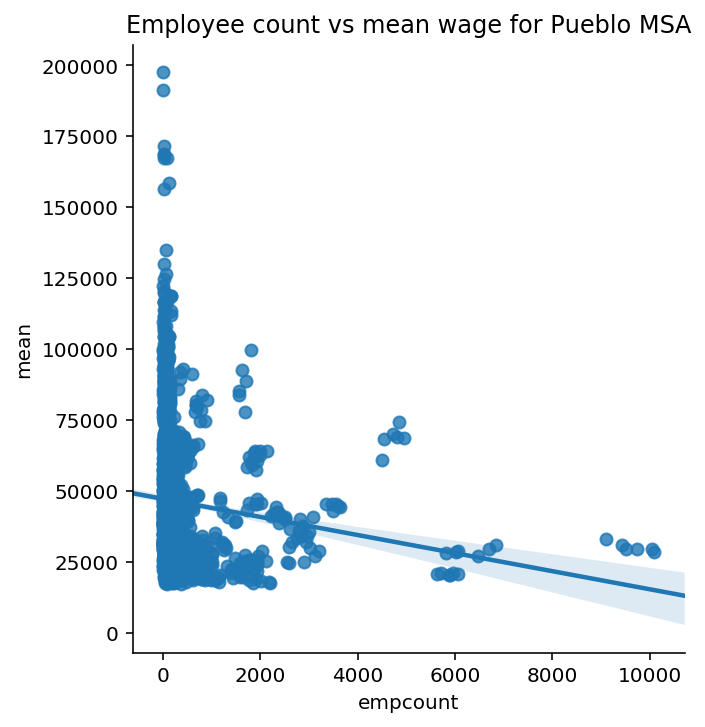

In [233]:
just_pueblo=df.loc[df['areaname']=='Pueblo MSA']
sns.lmplot(data=just_pueblo,x='empcount',y='mean')
plt.title('Employee count vs mean wage for Pueblo MSA')

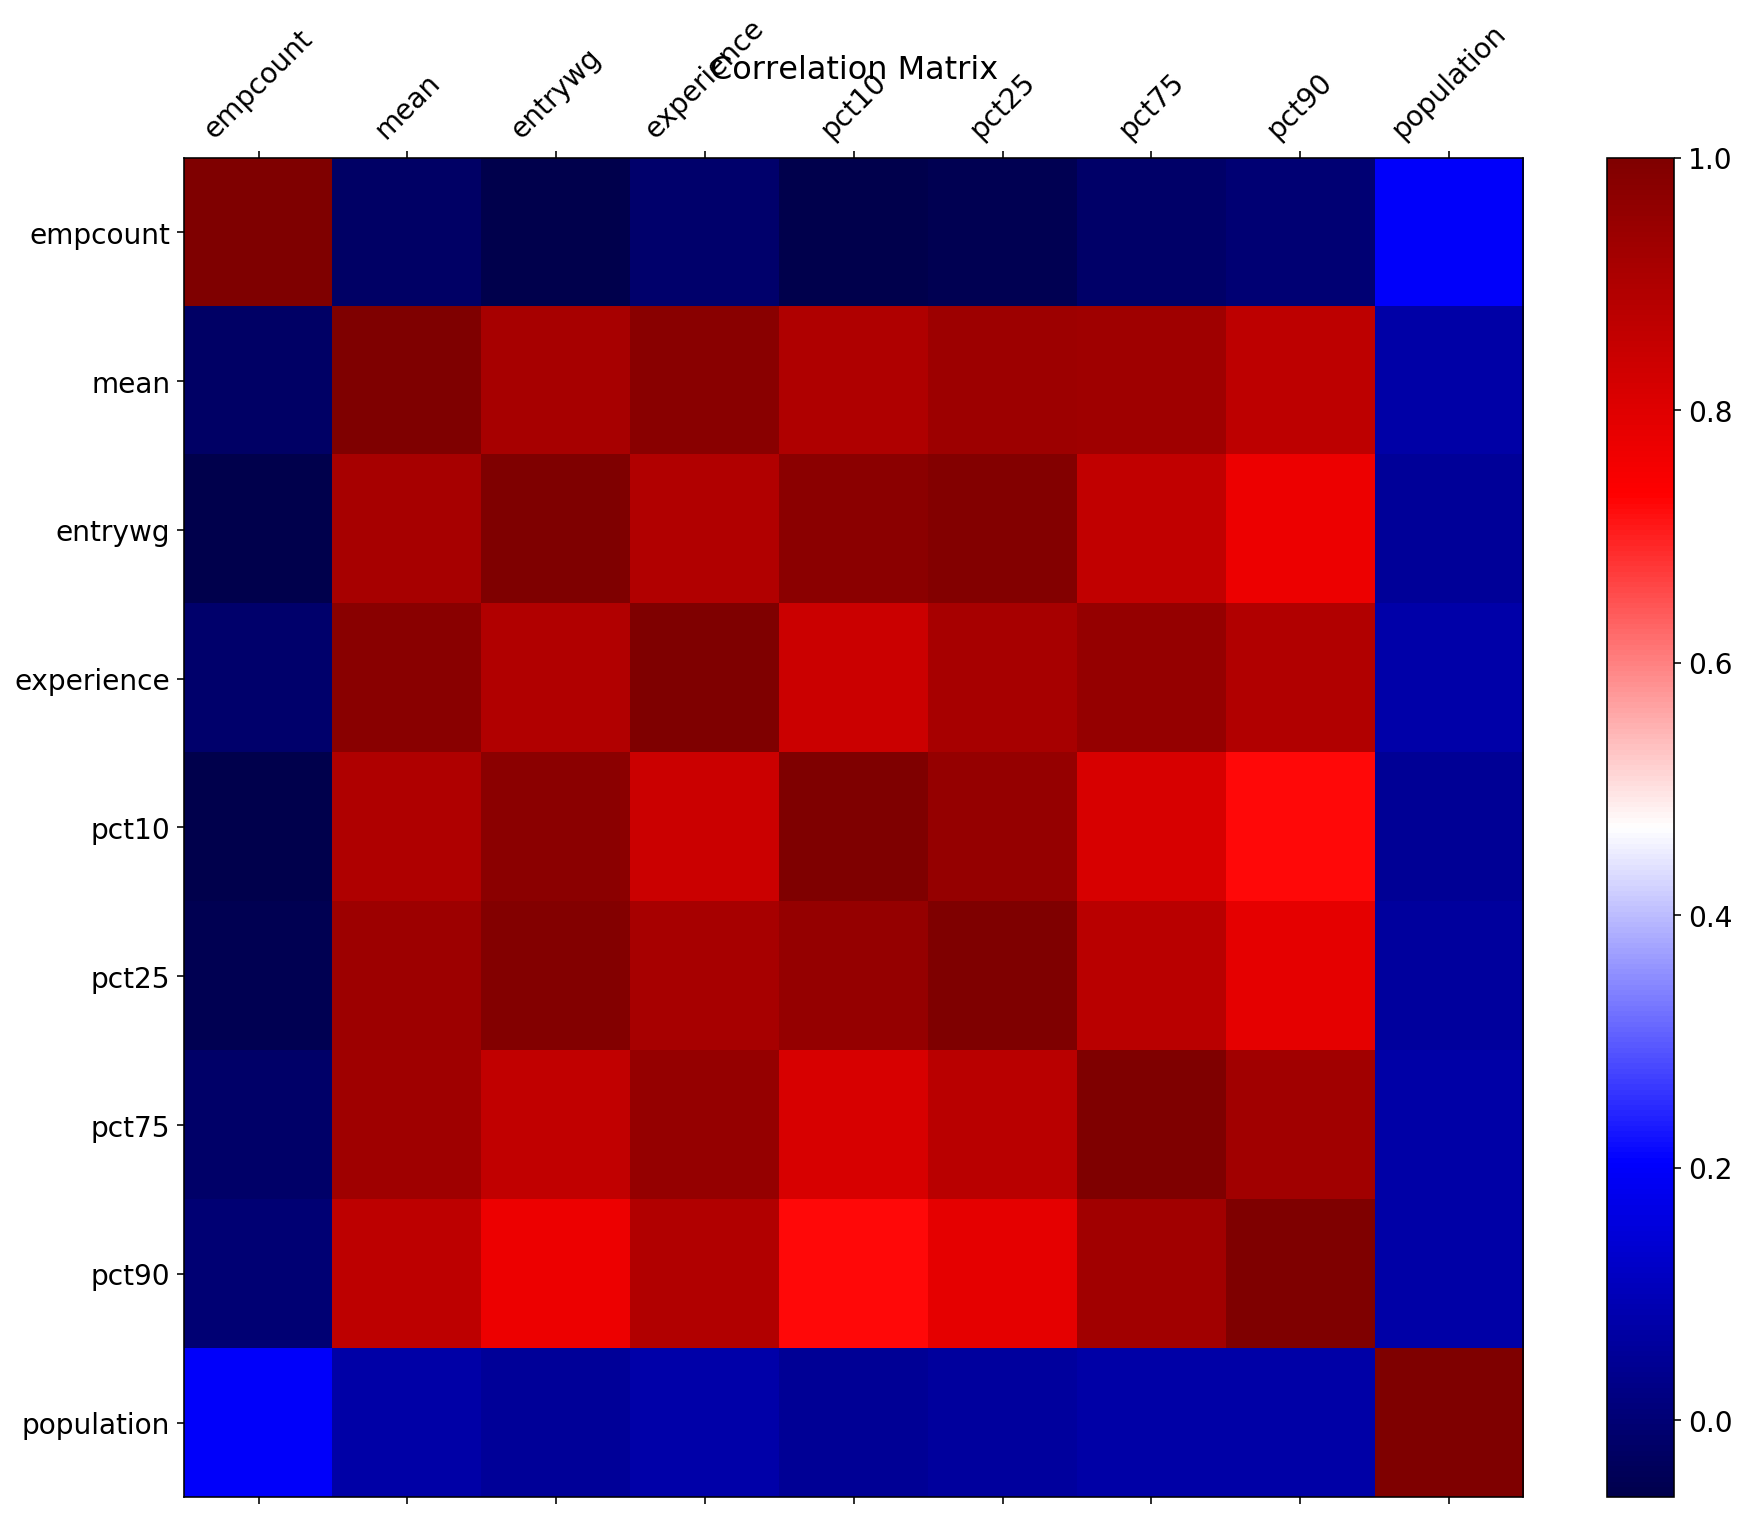

In [209]:
#let's run a basic correlation matrix on a few of our variables.
#Mean
#entrywg
#experience
#empcount
#periodyear
corrdf=df[df.columns[df.columns.isin(['mean','entrywg','experience','empcount','pct10','pct25','pct75','pct90','population'])]]

f = plt.figure(figsize=(15, 12))
plt.matshow(corrdf.corr(), fignum=f.number,cmap='seismic')
plt.xticks(range(corrdf.shape[1]), corrdf.columns, fontsize=14, rotation=45)
plt.yticks(range(corrdf.shape[1]), corrdf.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);




In [210]:
#let's get some estimated coefficients to see the degree to which these variables effect mean
X=corrdf.drop('mean',axis=1)

In [211]:
lm=LinearRegression()
lm.fit(X,df['mean'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [212]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 959.929198207421


In [213]:
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,empcount,-0.006666
1,entrywg,-1.498109
2,experience,0.680613
3,pct10,1.118887
4,pct25,0.703808
5,pct75,-0.005406
6,pct90,-0.002749
7,population,-0.000088


(array([   8.,    0., 1007., 2444., 2712., 2450., 1978., 1493., 1099.,
         909.,  716.,  538.,  410.,  267.,  189.,  141.,   83.,   61.,
          42.,   21.,   15.,   14.,   10.,    4.,    7.,    9.,    8.,
           4.,    3.,    3.]),
 array([   744.62737767,   8220.12006286,  15695.61274805,  23171.10543323,
         30646.59811842,  38122.09080361,  45597.58348879,  53073.07617398,
         60548.56885917,  68024.06154435,  75499.55422954,  82975.04691473,
         90450.53959991,  97926.0322851 , 105401.52497029, 112877.01765547,
        120352.51034066, 127828.00302585, 135303.49571103, 142778.98839622,
        150254.48108141, 157729.9737666 , 165205.46645178, 172680.95913697,
        180156.45182216, 187631.94450734, 195107.43719253, 202582.92987772,
        210058.4225629 , 217533.91524809, 225009.40793328]),
 <a list of 30 Patch objects>)

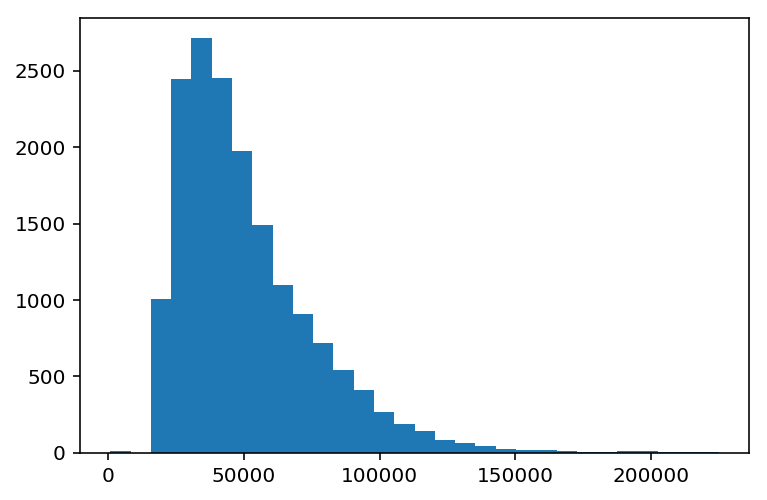

In [214]:
predictedprices=lm.predict(X)
plt.hist(predictedprices,bins=30)

Text(0.5,0,'predicted prices')

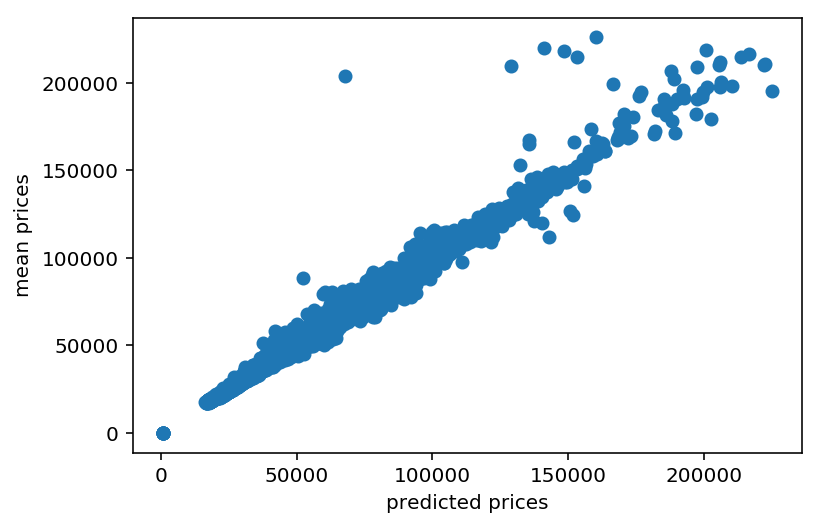

In [215]:
plt.scatter(predictedprices,df['mean'])
plt.ylabel('mean prices')
plt.xlabel('predicted prices')

In [216]:
df['quantile'] =pd.qcut(df['mean'],3,labels=['bottom','mid','top'])
print(df['quantile'].head())
print(len(df))
print(len(df['quantile']))

278    top
279    top
281    top
282    top
283    top
Name: quantile, dtype: category
Categories (3, object): [bottom < mid < top]
16645
16645


In [217]:
ol= ols('mean ~ entrywg + experience + empcount + pct10 + pct25 + pct75 + pct90 + population',df).fit()
print(ol.summary())

                            OLS Regression Results                            
Dep. Variable:                   mean   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 2.066e+05
Date:                Fri, 09 Aug 2019   Prob (F-statistic):               0.00
Time:                        14:17:45   Log-Likelihood:            -1.5402e+05
No. Observations:               16645   AIC:                         3.081e+05
Df Residuals:                   16636   BIC:                         3.081e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    959.9292     51.165     18.761      0.0

In [218]:
ol= ols('mean ~ empcount + experience + population',df).fit()
print(ol.summary())

                            OLS Regression Results                            
Dep. Variable:                   mean   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                 1.265e+05
Date:                Fri, 09 Aug 2019   Prob (F-statistic):               0.00
Time:                        14:17:45   Log-Likelihood:            -1.6600e+05
No. Observations:               16645   AIC:                         3.320e+05
Df Residuals:                   16641   BIC:                         3.320e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2603.0587     93.253     27.914      0.0

In [219]:
ol= ols('empcount ~ population',df).fit()
print(ol.summary())

                            OLS Regression Results                            
Dep. Variable:               empcount   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     680.6
Date:                Fri, 09 Aug 2019   Prob (F-statistic):          4.44e-147
Time:                        14:17:45   Log-Likelihood:            -1.7078e+05
No. Observations:               16645   AIC:                         3.416e+05
Df Residuals:                   16643   BIC:                         3.416e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    128.3915     72.049      1.782      0.0

C:\Users\jflan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'relationship between employee count and mean revenue')

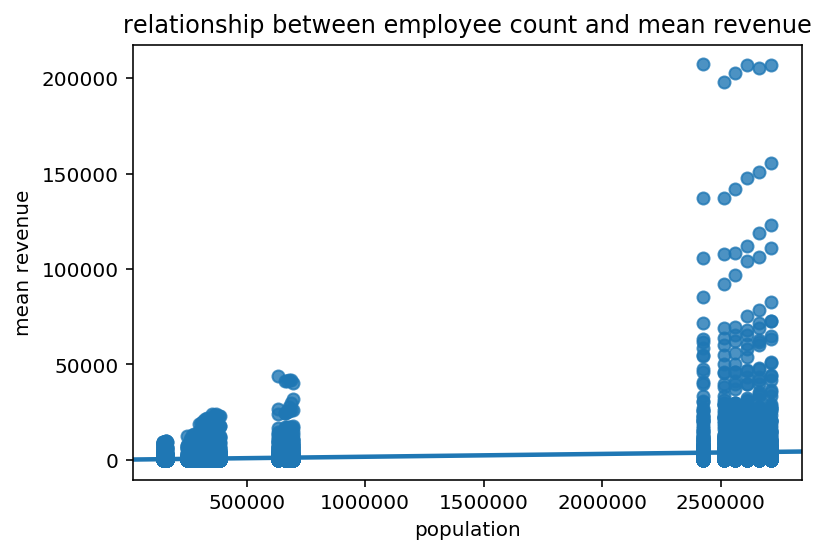

In [220]:
#Interesting to find that employee count is not correlated with mean revenue. Let's see if outliers are effecting this
sns.regplot(y="empcount",x="population",data=df,fit_reg=True)
plt.ylabel("mean revenue")
plt.xlabel("population")
plt.title("relationship between employee count and mean revenue")